In [1]:
from google.colab import drive

# This will prompt you to click a link and get an authorization code
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from hampel import hampel
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Apple watch

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/DMP/heart_rate_apple_watch_raw_clean.csv')

print(df)

     units                       date  heartRateData
0      bpm  2021-12-03 10:27:21 +0000             71
1      bpm  2021-12-03 10:29:24 +0000             65
2      bpm  2021-12-03 10:29:29 +0000             63
3      bpm  2021-12-03 10:29:34 +0000             58
4      bpm  2021-12-03 10:29:39 +0000             55
...    ...                        ...            ...
1366   bpm  2021-12-02 17:38:23 +0000            128
1367   bpm  2021-12-02 17:38:26 +0000            126
1368   bpm  2021-12-02 17:38:29 +0000            125
1369   bpm  2021-12-02 17:38:34 +0000            125
1370   bpm  2021-12-02 17:38:39 +0000            123

[1371 rows x 3 columns]


In [ ]:
apple_path = "/content/gdrive/MyDrive/DMP/heart_rate_apple_watch_raw_clean.csv"
apple_df_list = []

temp_df = pd.read_csv(apple_path)
#convert index to datetime
temp_df = temp_df.rename(columns={"Unnamed: 0": "Time"})
temp_df["date"] = pd.to_datetime(temp_df["date"])

temp_df = temp_df.set_index("date")
#upsample to 1 second without filling
temp_df = temp_df.resample("1S").asfreq().copy()

#fill next 4 values with the previous value
temp_df = temp_df.ffill(limit=4)
temp_df = temp_df[temp_df['heartRateData'].notna()]


apple_df_list.append(temp_df)

apple_df_all = pd.concat(apple_df_list, axis=0)
new_file_path = '/content/gdrive/MyDrive/DMP/apple_watch_data.csv'
apple_df_all.to_csv(new_file_path)

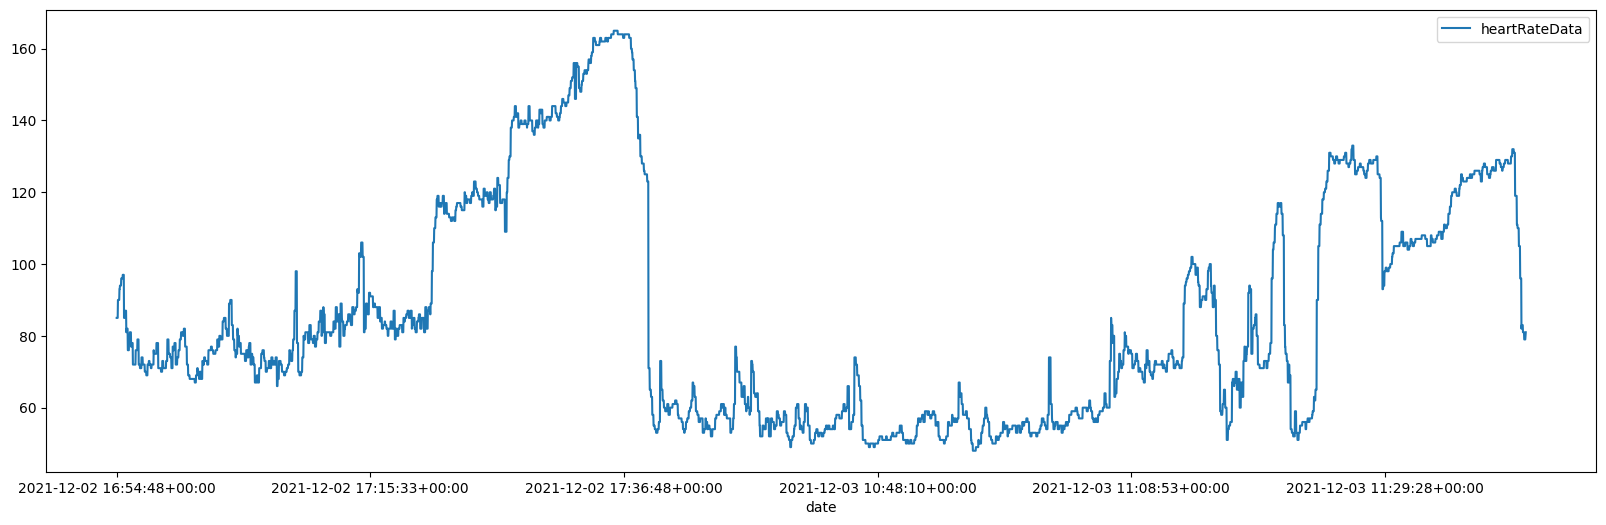

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(new_file_path)
table_titles = df.columns
df.plot(kind='line', x='date', y='heartRateData', figsize=(20, 6))  # Plot the data
plt.show()  # Show the plot


#apple watch energy data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DMP/Active_energy_apple_watch.csv')

print(df)

       active energy (kJ)                       date
0                0.002885  2021-11-22 18:30:18 +0000
1                0.015963  2021-11-22 18:30:19 +0000
2                0.015963  2021-11-22 18:30:20 +0000
3                0.015963  2021-11-22 18:30:21 +0000
4                0.015963  2021-11-22 18:30:22 +0000
...                   ...                        ...
57563            0.035591  2021-12-03 17:47:43 +0000
57564            0.035591  2021-12-03 17:47:44 +0000
57565            0.035591  2021-12-03 17:47:45 +0000
57566            0.035591  2021-12-03 17:47:46 +0000
57567            0.029342  2021-12-03 17:47:47 +0000

[57568 rows x 2 columns]


In [9]:
!pip install hampel



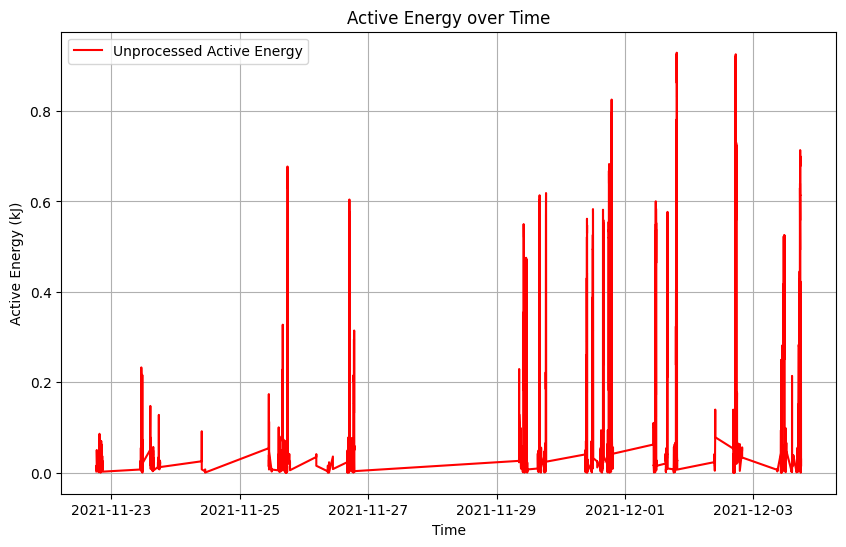

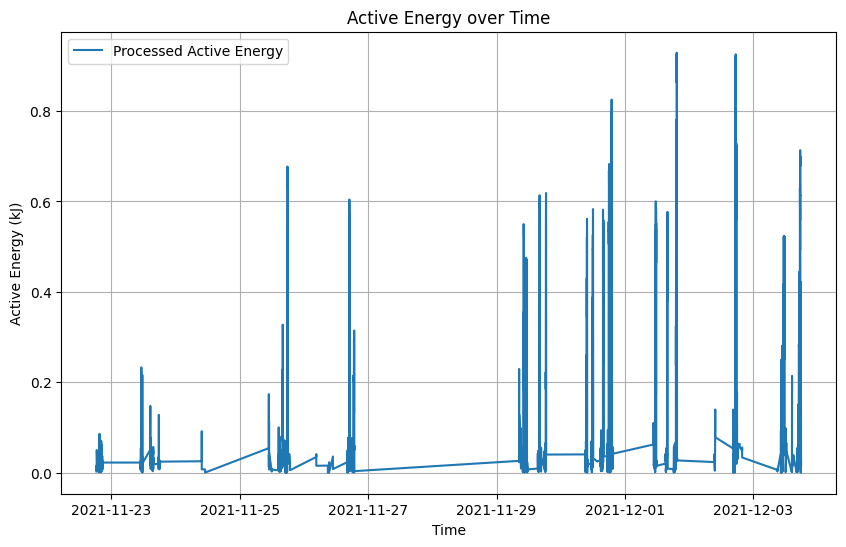

Filtered energy data saved to /content/gdrive/MyDrive/DMP/Active_energy_apple_watch_pro.pkl


In [8]:


# Read the CSV file into a DataFrame
apple_path_energy = "/content/gdrive/MyDrive/DMP/Active_energy_apple_watch.csv"
temp_df = pd.read_csv(apple_path_energy)

temp_df["date"] = pd.to_datetime(temp_df["date"])
temp_df = temp_df.set_index("date")

temp_df = temp_df[temp_df['active energy (kJ)'].notna()]

rolling_window_size = 5
filtered_energy = hampel(temp_df['active energy (kJ)'], window_size=rolling_window_size)

filtered_energy_series = filtered_energy.filtered_data

# Plot the unfiltered and filtered data
plt.figure(figsize=(10, 6))
plt.plot(temp_df.index, temp_df['active energy (kJ)'], label='Unprocessed Active Energy', color='red')
plt.xlabel('Time')
plt.ylabel('Active Energy (kJ)')
plt.title('Active Energy over Time')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 6))
plt.plot(temp_df.index, filtered_energy_series, label='Processed Active Energy')
plt.xlabel('Time')
plt.ylabel('Active Energy (kJ)')
plt.title('Active Energy over Time')
plt.legend()
plt.grid(True)
plt.show()

# Save the filtered energy data as a pickle file
pickle_file_path = '/content/gdrive/MyDrive/DMP/Active_energy_apple_watch_pro.pkl'
filtered_energy_series.to_pickle(pickle_file_path)

print(f"Filtered energy data saved to {pickle_file_path}")
